In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

In [2]:
def binomial_pmf(n, p):
    """
    Calculate Probability Mass Function for Binomial distribution
    """
    x = np.arange(0, n + 1)
    pmf = stats.binom.pmf(x, n, p)
    return x, pmf

def binomial_cdf(n, p):
    """
    Calculate Cumulative Distribution Function for Binomial distribution
    """
    x = np.arange(0, n + 1)
    cdf = stats.binom.cdf(x, n, p)
    return x, cdf

def simulate_binomial(n, p, n_samples):
    """
    Simulate n_samples from Binomial distribution
    """
    return np.random.binomial(n=n, p=p, size=n_samples)

def plot_binomial_distribution(n, p, n_samples=1000):
    """
    Create comprehensive visualization of Binomial distribution
    including PMF, CDF, and both original and smoothed histograms
    """
    # Create figure with four subplots in a 2x2 grid
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: PMF
    x, pmf = binomial_pmf(n, p)
    ax1.bar(x, pmf, alpha=0.8, color='blue', label='PMF')
    ax1.plot(x, pmf, 'r--', alpha=0.5)  # Add connecting lines
    ax1.set_title(f'Binomial PMF (n={n}, p={p})')
    ax1.set_xlabel('Number of Successes')
    ax1.set_ylabel('Probability')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: CDF
    x_cdf, cdf = binomial_cdf(n, p)
    ax2.step(x_cdf, cdf, 'r-', label='CDF', where='post')
    ax2.set_title(f'Binomial CDF (n={n}, p={p})')
    ax2.set_xlabel('Number of Successes')
    ax2.set_ylabel('Cumulative Probability')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Generate samples
    samples = simulate_binomial(n, p, n_samples)
    
    # Plot 3: Original Histogram
    bins = np.arange(-0.5, n + 1.5, 1)  # Bins centered on integers
    ax3.hist(samples, bins=bins, density=True, alpha=0.7,
             color='green', label='Original Histogram')
    
    # Add PMF points for comparison
    ax3.plot(x, pmf, 'r.', markersize=10, label='Theoretical PMF')
    ax3.set_title(f'Original Histogram vs PMF\n{n_samples} Trials (n={n}, p={p})')
    ax3.set_xlabel('Number of Successes')
    ax3.set_ylabel('Density')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Plot 4: Smoothed Histogram with KDE
    ax4.hist(samples, bins=bins, density=True, alpha=0.3,
             color='green', label='Histogram')
    
    # Add kernel density estimation
    x_kde = np.linspace(-0.5, n + 0.5, 200)
    kde = gaussian_kde(samples, bw_method='scott')  # Using Scott's rule for bandwidth
    ax4.plot(x_kde, kde(x_kde), 'r-', label='KDE Smoothing', linewidth=2)
    
    # Add PMF points for comparison
    ax4.plot(x, pmf, 'b.', markersize=10, label='Theoretical PMF')
    
    ax4.set_title(f'Smoothed Histogram with KDE\n{n_samples} Trials (n={n}, p={p})')
    ax4.set_xlabel('Number of Successes')
    ax4.set_ylabel('Density')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    
    plt.tight_layout()
    return fig

In [3]:
# Example usage
n = 10    # number of trials
p = 0.3   # probability of success
n_samples = 2000

In [4]:
# Calculate theoretical mean and variance
mean = n * p
variance = n * p * (1 - p)

In [5]:
# Generate samples
samples = simulate_binomial(n, p, n_samples)

In [6]:
# Calculate sample statistics
sample_mean = np.mean(samples)
sample_variance = np.var(samples)

Theoretical Mean: 3.000
Sample Mean: 3.069
Theoretical Variance: 2.100
Sample Variance: 2.114


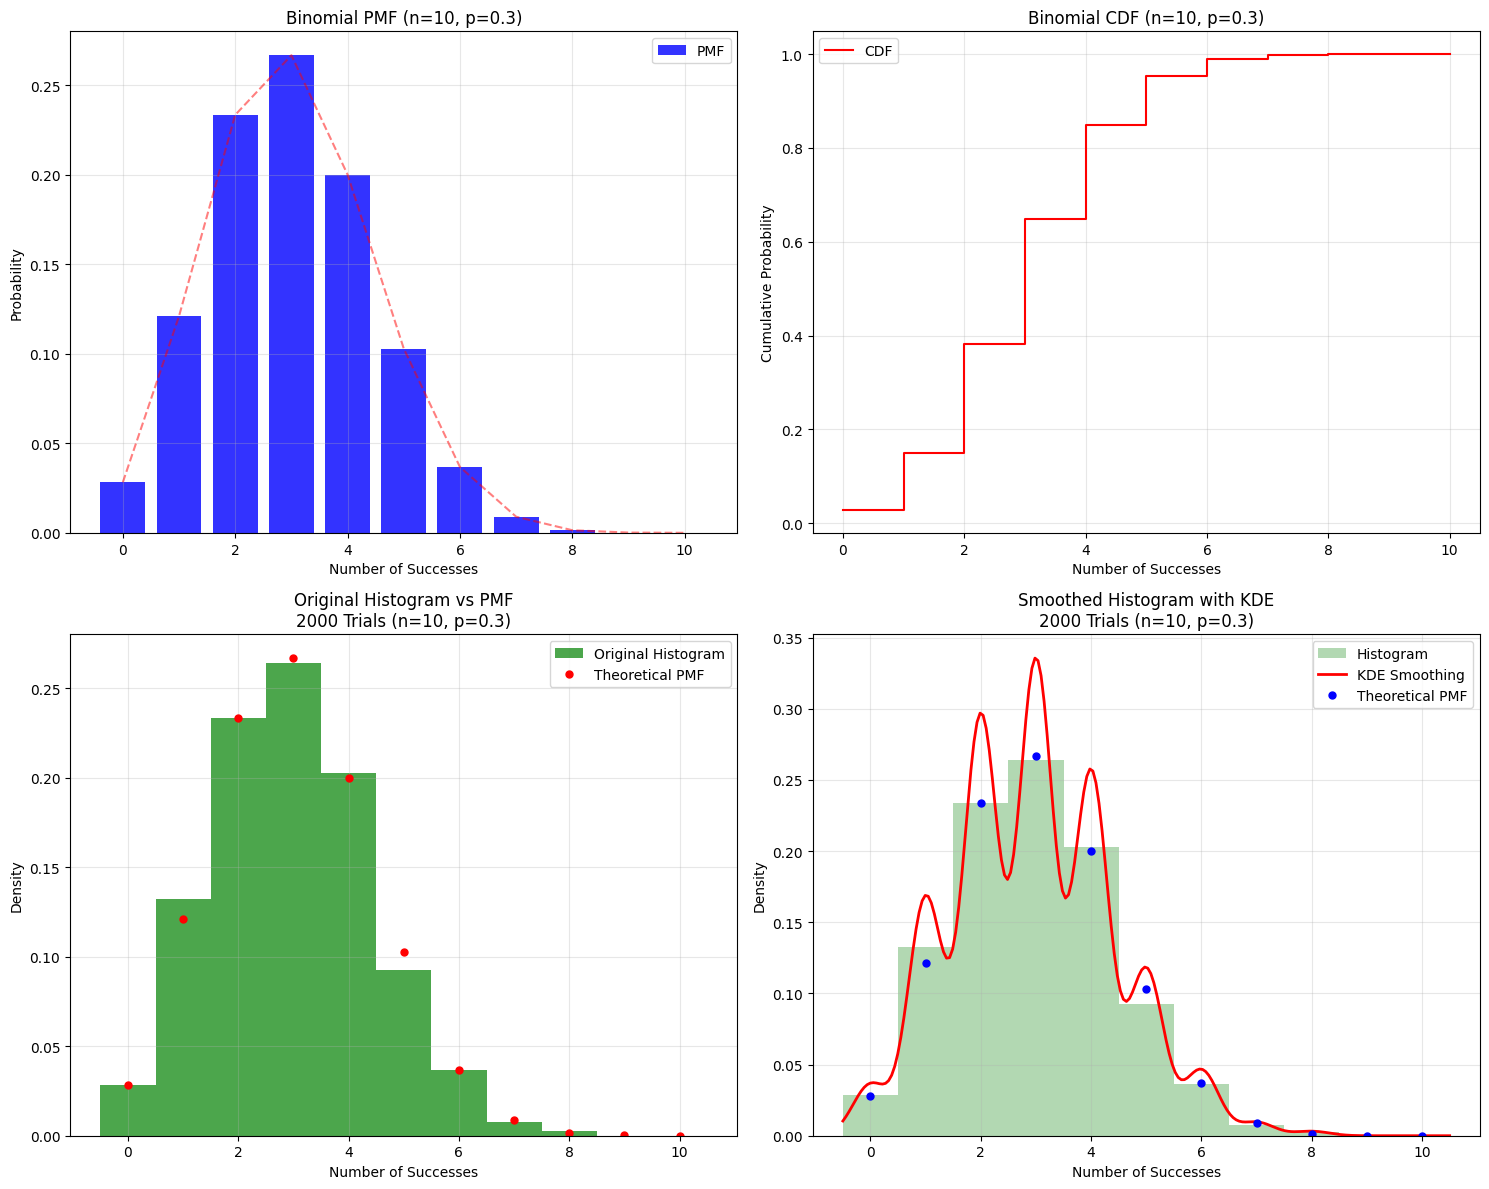

In [7]:
# Print statistics
print(f"Theoretical Mean: {mean:.3f}")
print(f"Sample Mean: {sample_mean:.3f}")
print(f"Theoretical Variance: {variance:.3f}")
print(f"Sample Variance: {sample_variance:.3f}")

# Create and display plot
plot_binomial_distribution(n, p, n_samples)
plt.show()

Theoretical Mean: 9.000
Sample Mean: 8.903
Theoretical Variance: 6.300
Sample Variance: 6.455


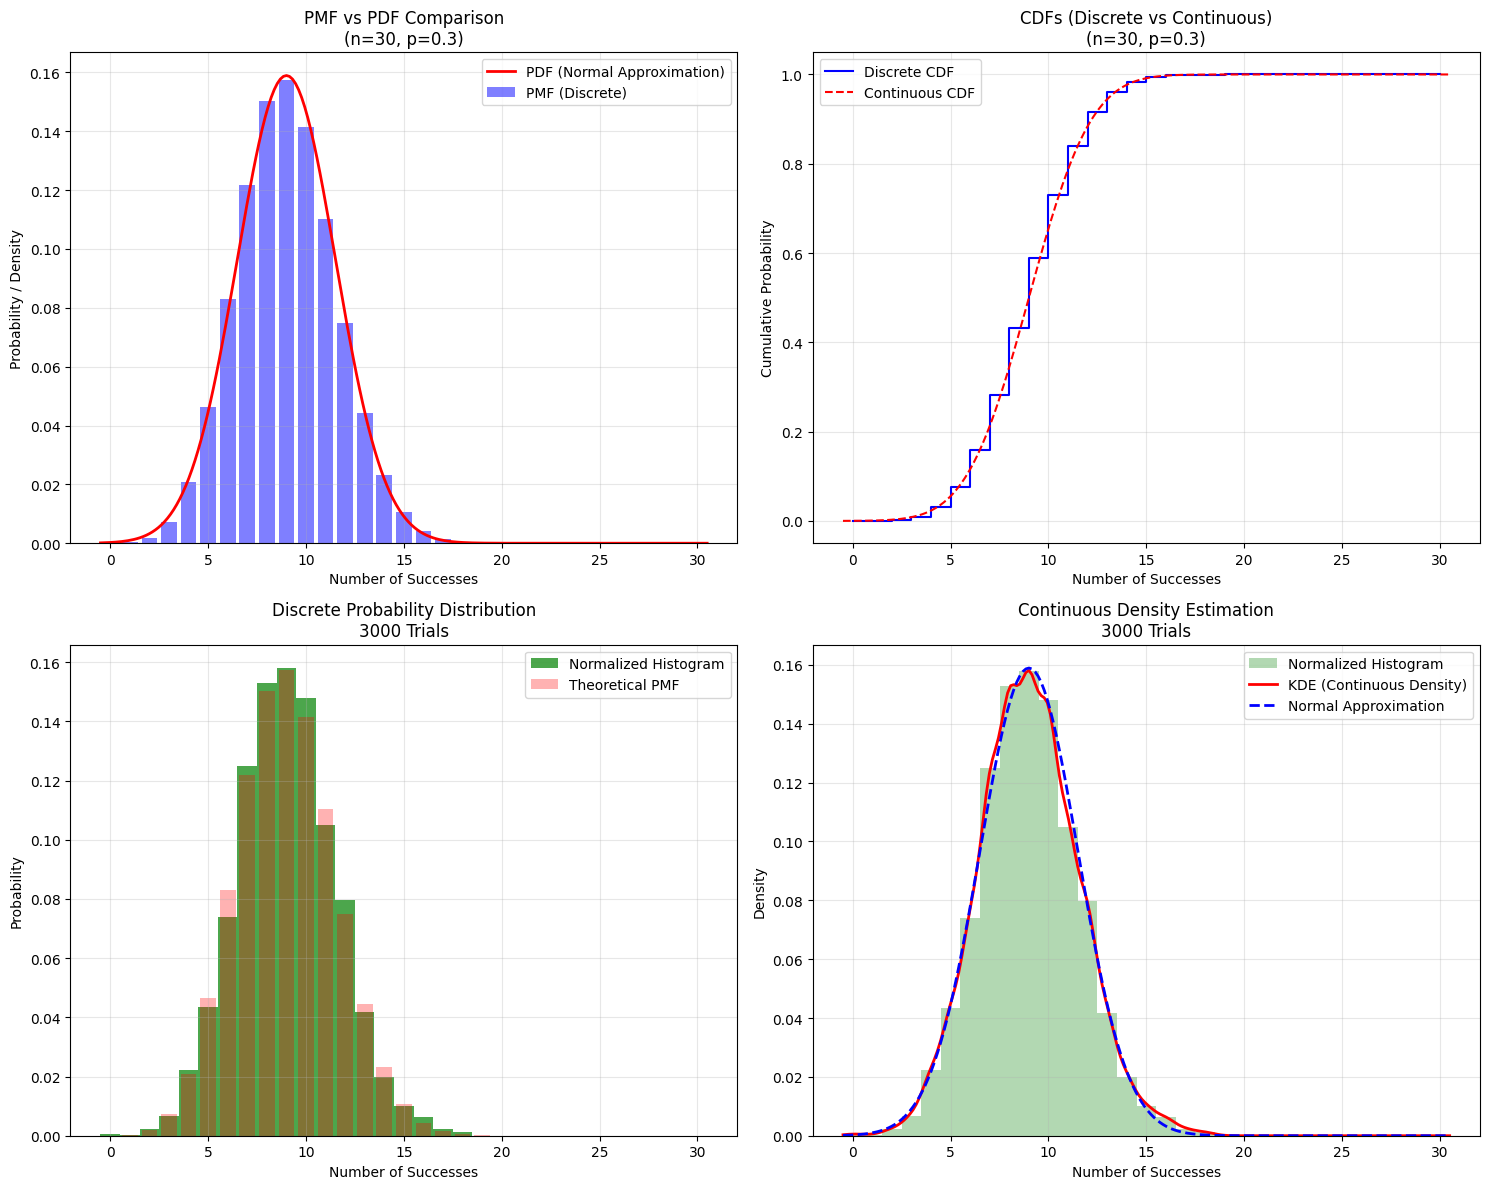

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

def binomial_pmf(n, p):
    """
    Calculate Probability Mass Function for Binomial distribution
    """
    x = np.arange(0, n + 1)
    pmf = stats.binom.pmf(x, n, p)
    return x, pmf

def binomial_pdf_approximation(n, p):
    """
    Calculate continuous approximation (PDF) for Binomial distribution
    Using Normal approximation when np(1-p) > 9
    """
    x = np.linspace(-0.5, n + 0.5, 200)
    mean = n * p
    std = np.sqrt(n * p * (1-p))
    pdf = stats.norm.pdf(x, mean, std)
    return x, pdf

def binomial_cdf(n, p):
    """
    Calculate Cumulative Distribution Function for Binomial distribution
    """
    x = np.arange(0, n + 1)
    cdf = stats.binom.cdf(x, n, p)
    return x, cdf

def simulate_binomial(n, p, n_samples):
    """
    Simulate n_samples from Binomial distribution
    """
    return np.random.binomial(n=n, p=p, size=n_samples)

def plot_binomial_distribution(n, p, n_samples=1000):
    """
    Create comprehensive visualization of Binomial distribution
    including PMF, PDF, CDF, and density estimations
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: PMF and PDF Comparison
    x_pmf, pmf = binomial_pmf(n, p)
    x_pdf, pdf = binomial_pdf_approximation(n, p)
    
    # Plot PMF as bars
    ax1.bar(x_pmf, pmf, alpha=0.5, color='blue', label='PMF (Discrete)')
    # Plot PDF as continuous line
    ax1.plot(x_pdf, pdf, 'r-', label='PDF (Normal Approximation)', linewidth=2)
    
    ax1.set_title(f'PMF vs PDF Comparison\n(n={n}, p={p})')
    ax1.set_xlabel('Number of Successes')
    ax1.set_ylabel('Probability / Density')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot 2: CDF
    x_cdf, cdf = binomial_cdf(n, p)
    ax2.step(x_cdf, cdf, 'b-', label='Discrete CDF', where='post')
    # Add continuous CDF
    x_cont = np.linspace(-0.5, n + 0.5, 200)
    cdf_cont = stats.norm.cdf(x_cont, n*p, np.sqrt(n*p*(1-p)))
    ax2.plot(x_cont, cdf_cont, 'r--', label='Continuous CDF')
    
    ax2.set_title(f'CDFs (Discrete vs Continuous)\n(n={n}, p={p})')
    ax2.set_xlabel('Number of Successes')
    ax2.set_ylabel('Cumulative Probability')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Generate samples
    samples = simulate_binomial(n, p, n_samples)
    
    # Plot 3: Histogram with PMF
    bins = np.arange(-0.5, n + 1.5, 1)
    ax3.hist(samples, bins=bins, density=True, alpha=0.7,
             color='green', label='Normalized Histogram')
    ax3.bar(x_pmf, pmf, alpha=0.3, color='red', label='Theoretical PMF')
    
    ax3.set_title(f'Discrete Probability Distribution\n{n_samples} Trials')
    ax3.set_xlabel('Number of Successes')
    ax3.set_ylabel('Probability')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Plot 4: Density Estimation
    ax4.hist(samples, bins=bins, density=True, alpha=0.3,
             color='green', label='Normalized Histogram')
    
    # KDE (continuous density estimation)
    kde = gaussian_kde(samples, bw_method='scott')
    x_kde = np.linspace(-0.5, n + 0.5, 200)
    ax4.plot(x_kde, kde(x_kde), 'r-', label='KDE (Continuous Density)', linewidth=2)
    # Add theoretical PDF
    ax4.plot(x_pdf, pdf, 'b--', label='Normal Approximation', linewidth=2)
    
    ax4.set_title(f'Continuous Density Estimation\n{n_samples} Trials')
    ax4.set_xlabel('Number of Successes')
    ax4.set_ylabel('Density')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    
    plt.tight_layout()
    return fig

# Example usage with larger n for better normal approximation
n = 30    # number of trials (increased for better normal approximation)
p = 0.3   # probability of success
n_samples = 3000

# Calculate theoretical mean and variance
mean = n * p
variance = n * p * (1 - p)

# Generate samples
samples = simulate_binomial(n, p, n_samples)

# Calculate sample statistics
sample_mean = np.mean(samples)
sample_variance = np.var(samples)

# Print statistics
print(f"Theoretical Mean: {mean:.3f}")
print(f"Sample Mean: {sample_mean:.3f}")
print(f"Theoretical Variance: {variance:.3f}")
print(f"Sample Variance: {sample_variance:.3f}")

# Create and display plot
plot_binomial_distribution(n, p, n_samples)
plt.show()